In [1]:
import scipy.io
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import dateutil
from dateutil.parser import parse
import pylab
from matplotlib import pyplot as plt
from IPython import get_ipython
import datetime
import matplotlib.dates
import math
from tqdm import tqdm_notebook
from scipy.signal import savgol_filter

%matplotlib inline
plt.style.use('dark_background')

In [2]:
master_df = pd.read_csv('../processed_data/master_dataset.csv')

In [4]:
master_df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'Chile',
       'Cameroon', 'Colombia', 'Cape Verde', 'Costa Rica', 'Germany',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Finland', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras',
       'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iraq',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'South Korea', 'Kuwait', 'Laos', 'Lebanon', 'Libya',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Moldova', 'Mexico',
       'Mali', 'Mongolia', 'Mozambique', 'Mauritius', 'Malaysia',
       'Namibia', 'Niger', 'Nigeria', 'Nicaragua

In [5]:
master_df.CountryCode.unique()

array(['ABW', 'AFG', 'AGO', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN',
       'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA',
       'BRB', 'BWA', 'CAN', 'CHE', 'CHL', 'CMR', 'COL', 'CPV', 'CRI',
       'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IND', 'IRL', 'IRQ', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LKA',
       'LTU', 'LUX', 'MDA', 'MEX', 'MLI', 'MNG', 'MOZ', 'MUS', 'MYS',
       'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN',
       'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRT', 'PRY',
       'QAT', 'ROU', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVN',
       'SWE', 'THA', 'TTO', 'TUR', 'TZA', 'UGA', 'URY', 'USA', 'VEN',
       'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE', 'TWN'], dtype=object)

In [6]:
master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [7]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    gov_index_work = []
    cont_index_work = []
    econ_index_work = []
    strin_index_work = []
    cases = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_work.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_work.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_work.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_work.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases.append(cases_index)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    new_df['gov_index_work'] = gov_index_work
    new_df['cont_index_work'] = cont_index_work
    new_df['econ_index_work'] = econ_index_work
    new_df['strin_index_work'] = strin_index_work
    new_df['cases_work'] = cases
    
    #transit
    dates_tran= []
    u30tran_vals = []
    gov_index_tran = []
    cont_index_tran = []
    econ_index_tran = []
    strin_index_tran = []
    cases_tran = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['transit_stations_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates_tran.append(date)
        u30tran_val = country_df['transit_stations_percent_change_from_baseline'].loc[idx]
        u30tran_vals.append(u30tran_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_tran.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_tran.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_tran.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_tran.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases_tran.append(cases_index)
    new_df['date_tran_under_30'] = dates_tran
    new_df['val_tran_under_30'] = u30tran_vals
    new_df['gov_index_tran'] = gov_index_tran
    new_df['cont_index_tran'] = cont_index_tran
    new_df['econ_index_tran'] = econ_index_tran
    new_df['strin_index_tran'] = strin_index_tran
    new_df['cases_tran'] = cases_tran
    return new_df

In [8]:
new_df = make_df()
new_df

,CountryName,CountryCode,date_work_under_30,val_work_under_30,gov_index_work,cont_index_work,econ_index_work,strin_index_work,cases_work,date_tran_under_30,val_tran_under_30,gov_index_tran,cont_index_tran,econ_index_tran,strin_index_tran,cases_tran
0,Aruba,ABW,2020-02-24,-62.0,0.00,0.00,0.0,0.00,0.0,2020-03-18,-49.0,23.72,28.03,0.0,30.56,3.428571
1,Afghanistan,AFG,2020-03-21,-36.0,31.41,37.12,0.0,36.11,24.0,2020-03-28,-32.0,49.36,58.33,0.0,62.04,91.000000
2,Angola,AGO,2020-02-24,-63.0,3.85,4.55,0.0,5.56,0.0,2020-03-22,-41.0,10.26,12.12,0.0,11.11,2.000000
3,United Arab Emirates,ARE,2020-03-25,-35.0,66.67,69.70,50.0,70.37,248.0,2020-03-19,-31.0,41.67,49.24,0.0,45.37,113.000000
4,Argentina,ARG,2020-02-24,-54.0,7.69,9.09,0.0,11.11,0.0,2020-03-17,-32.0,35.26,41.67,0.0,41.67,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Yemen,YEM,2020-02-15,3.0,0.00,0.00,0.0,0.00,0.0,2020-02-15,4.0,0.00,0.00,0.0,0.00,0.000000
110,South Africa,ZAF,2020-03-26,-32.0,71.15,84.09,0.0,87.96,709.0,2020-03-22,-36.0,48.72,57.58,0.0,55.56,240.000000
111,Zambia,ZMB,2020-03-09,-44.0,11.54,13.64,0.0,16.67,0.0,2020-04-13,-32.0,49.36,53.79,25.0,50.93,43.000000
112,Zimbabwe,ZWE,2020-02-21,-58.0,5.77,6.82,0.0,8.33,0.0,2020-02-21,-33.0,5.77,6.82,0.0,8.33,0.000000


In [9]:
taiwan = master_df[master_df.CountryCode == 'ABW']
taiwan

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.0
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.0
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.0
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.0
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,Aruba,ABW,2020-05-12,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-12,-50.0,-21.0,-28.0,-53.0,-43.0,23.0
88,88,Aruba,ABW,2020-05-13,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-13,-51.0,-22.0,-34.0,-54.0,-43.0,24.0
89,89,Aruba,ABW,2020-05-14,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-14,-51.0,-22.0,-32.0,-54.0,-43.0,22.0
90,90,Aruba,ABW,2020-05-15,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-15,-51.0,-16.0,-29.0,-55.0,-40.0,23.0


In [10]:
taiwan['transit_stations_percent_change_from_baseline'].describe()

count    92.000000
mean    -41.739130
std      33.570614
min     -92.000000
25%     -68.000000
50%     -55.000000
75%       0.000000
max      29.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64

In [12]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    return new_df

In [13]:
df = make_df()
df

,CountryName,CountryCode,date_work_under_30,val_work_under_30
0,Aruba,ABW,2020-02-24,-62.0
1,Afghanistan,AFG,2020-03-21,-36.0
2,Angola,AGO,2020-02-24,-63.0
3,United Arab Emirates,ARE,2020-03-25,-35.0
4,Argentina,ARG,2020-02-24,-54.0
...,...,...,...,...
109,Yemen,YEM,2020-02-15,3.0
110,South Africa,ZAF,2020-03-26,-32.0
111,Zambia,ZMB,2020-03-09,-44.0
112,Zimbabwe,ZWE,2020-02-21,-58.0


In [14]:
usa = master_df[master_df.CountryCode == 'USA']
mob_sg = savgol_filter(usa['retail_and_recreation_percent_change_from_baseline'], 25, 3)
initial = usa['Unnamed: 0'].iloc[0]
usa['Day'] = usa['Unnamed: 0'].apply(lambda x: x - initial)
usa['smooth'] = mob_sg
usa['smooth'].min()
x = usa[usa['GovernmentResponseIndexForDisplay']!= 0]
x['GovernmentResponseIndexForDisplay'].mean()
"""
'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
"""

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


"\n'retail_and_recreation_percent_change_from_baseline',\n       'grocery_and_pharmacy_percent_change_from_baseline',\n       'parks_percent_change_from_baseline',\n       'transit_stations_percent_change_from_baseline',\n       'workplaces_percent_change_from_baseline',\n       'residential_percent_change_from_baseline'],\n"

In [39]:
from copy import copy

def smooth_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country].copy()
        master_df['smooth_workplaces_percent_change_from_baseline'] = 0
        minind = country_df['Unnamed: 0'].min()
        maxind = country_df['Unnamed: 0'].max()
        mob_sg = savgol_filter(country_df['workplaces_percent_change_from_baseline'], 25, 3)
        country_df['smooth_workplaces_percent_change_from_baseline'] = mob_sg.copy()


        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_workplaces_percent_change_from_baseline'].iloc[minind:maxind] = country_df['smooth_workplaces_percent_change_from_baseline']
    return master_df
smooth_df()

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,smooth,smooth_workplaces_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.0,0.0,0.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.0,0.0,0.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.0,0.0,0.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.0,0.0,0.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,10483,Taiwan,TWN,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-12,-15.0,3.0,-14.0,-19.0,8.0,3.0,0.0,5.014293
10484,10484,Taiwan,TWN,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-13,-11.0,4.0,1.0,-15.0,9.0,2.0,0.0,4.919259
10485,10485,Taiwan,TWN,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-14,-10.0,5.0,-9.0,-18.0,7.0,-2.0,0.0,4.525671
10486,10486,Taiwan,TWN,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-15,-5.0,6.0,0.0,-11.0,2.0,1.0,0.0,3.791111


In [44]:
master_df=pd.read_csv('../processed_data/master_dataset.csv')

master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [48]:
cols = [
      'GovernmentResponseIndexForDisplay',
      'ContainmentHealthIndexForDisplay',
      'EconomicSupportIndexForDisplay',
      'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
for col in cols: 
    master_df['smooth_'+col] = 0
    for cc in master_df['CountryCode'].unique():
        ts_data = np.array(master_df[col][master_df['CountryCode'] == cc])
        print(ts_data)

        mob_sg = savgol_filter(ts_data, 25, 3)

        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_'+col][master_df['CountryCode'] == cc] = mob_sg


[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  2.56  2.56  2.56  2.56  2.56  8.33 16.03 16.03 23.72 27.56 27.56 35.26
 35.26 35.26 35.26 35.26 35.26 35.26 35.26 63.46 63.46 63.46 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 73.72 71.15 73.72 73.72 71.15
 71.15 71.15 71.15 73.08 73.08 71.15 71.15 71.15 71.15 71.15 71.15 71.15
 71.15 71.15 71.15 71.15 71.15 71.15 71.15 68.59 68.59 68.59 68.59 68.59
 68.59 68.59 68.59 68.59 68.59 68.59 68.59 68.59]
[ 0.    0.    0.    0.    0.    0.    0.    0.    2.56  6.41  6.41  6.41
  6.41  6.41  6.41 19.87 21.79 21.79 21.79 21.79 21.79 21.79 21.79 21.79
 21.79 21.79 21.79 21.79 29.49 29.49 29.49 29.49 31.41 31.41 31.41 31.41
 31.41 31.41 37.82 43.59 43.59 43.59 49.36 49.36 49.36 49.36 49.36 49.36
 49.36 49.36 57.05 57.05 57.05 57.05 57.05 57.05 57.05 60.9  60.9  60.9
 60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9  60.9
 60.9  

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[ 9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62 16.67 20.51
 20.51 20.51 22.44 22.44 28.85 28.85 28.85 28.85 28.85 28.85 28.85 28.85
 28.85 28.85 28.85 38.46 42.31 42.31 62.82 84.62 84.62 84.62 84.62 84.62
 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62
 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62
 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62
 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62 84.62
 84.62 84.62 81.41 81.41 81.41 81.41 81.41 81.41]
[ 9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62
  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62  9.62
  9.62  9.62 14.74 28.21 28.21 28.21 35.9  35.9  35.9  35.9  48.72 48.72
 48.72 48.72 48.72 48.72 48.72 48.72 48.72 48.72 56.41 56.41 56.41 56.41
 56.41 56.41 56.41 56.41 56.41 56.41 64.1  73.72 73.72 74.04 75.   80.77
 80.77 80.77 80.77 80.77 80.77 80.77 80.77 80.77 80.77 83.33 83.33 83.33
 

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92
  1.92  1.92  1.92  1.92 16.03 16.03 16.03 44.87 44.87 44.87 44.87 44.87
 44.87 44.87 46.79 46.79 50.64 60.26 60.26 60.26 60.26 60.26 67.95 67.95
 67.95 67.95 67.95 67.95 67.95 67.95 67.95 67.95 67.95 67.95 67.95 67.95
 67.95 67.95 72.44 72.44 72.44 72.44 72.44 72.44 72.44 72.44 72.44 72.44
 72.44 72.44 72.44 72.44 72.44 72.44 72.44 72.44 61.54 61.54 63.46 63.46
 63.46 63.46 63.46 63.46 63.46 63.46 63.46 63.46]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    9.62  9.62  9.62  9.62 17.31 17.31 31.41 39.1  39.1
 39.1  39.1  39.1  39.1  39.1  42.95 48.72 48.72 48.72 48.72 48.72 48.72
 48.72 48.72 48.72 48.72 48.72 48.72 48.72 48.72 48.72 48.72 48.72 48.72
 52.56 52.56 52.56 52.56 52.56 52.56 52.56 52.56 52.56 52.56 52.56 52.56
 52.56 5

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    7.69  7.69 23.08 23.08 26.92
 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92
 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92
 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92 26.92
 26.92 26.92 26.92 32.69 36.54 36.54 36.54 36.54 35.26 35.26 35.26 35.26
 35.26 35.26 35.26 35.26 35.26 35.26 35.26 35.26]
[ 1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92
  1.92  1.92  1.92  1.92  1.92  1.92  1.92  9.62  9.62 19.87 19.87 19.87
 19.87 19.87 19.87 19.87 19.87 23.72 37.18 37.18 48.72 48.72 48.72 48.72
 48.72 48.72 48.72 48.72 71.15 71.15 73.72 73.72 73.72 73.72 73.72 73.72
 73.72 73.72 73.72 73.72 73.72 73.72 73.72 73.72 73.72 73.72 73.72 73.72
 73.72 73.72 73.72 73.72 73.72 73.72 77.56 77.56 77.56 77.56 77.56 77.56
 77.5

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 13.64 13.64 13.64 13.64 13.64 19.7  19.7  19.7  33.33 33.33 33.33 33.33
 37.88 46.21 46.21 63.64 65.91 65.91 65.91 65.91 71.21 71.21 71.21 71.21
 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21
 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21 71.21
 68.18 68.18 68.18 68.18 68.18 71.21 71.21 71.21 75.76 75.76 75.76 75.76
 75.76 75.76 75.76 75.76 75.76 75.76 75.76 75.76 75.76 75.76 75.76 73.48
 73.48 73.48 73.48 76.52 76.52 76.52 76.52 76.52]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    9.09  9.09  9.09  9.09  9.09  9.09  9.09  9.09
  9.09  9.09 13.64 13.64 13.64 13.64 23.48 26.52 26.52 62.12 71.21 71.21
 77.27 77.27 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09
 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09 84.09
 84.09 84.09 84.09 87.12 87.12 87.12 87.12 87.12 87.12 87.12 87.12 87.12
 87.1

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   17.42 26.52 56.82 56.82 56.82 56.82 56.82 56.82
 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03
 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03 78.03
 78.03 87.12 89.39 89.39 89.39 89.39 89.39 89.39 89.39 89.39 89.39 87.88
 87.88 87.88 87.88 87.88 87.88 90.91 90.91 90.91 90.91 90.91 90.91 90.91
 90.91 90.91 90.91 90.91 90.91 90.91 90.91 90.91]
[18.94 18.94 18.94 18.94 18.94 18.94 18.94 18.94 18.94 21.21 21.21 21.21
 21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21 21.21
 21.21 21.21 21.21 27.27 52.27 52.27 61.36 61.36 78.79 81.06 84.85 84.85
 84.85 91.67 91.67 91.67 91.67 93.94 93.94 93.94 93.94 93.94 93.94 93.94
 93.94 93.94 93.94 93.94 96.97 96.97 96.97 96.97 96.97 96.97 96.97 96.97
 96.97 96.97 96.97 83.33 83.33 81.82 81.82 78.79 78.79 80.3  80.3  80.3
 80.3 

[18.18 18.18 18.18 18.18 18.18 18.18 18.18 18.18 18.18 18.18 18.18 18.18
 18.18 18.18 18.18 18.18 18.18 18.18 18.18 24.24 24.24 24.24 31.06 40.15
 40.15 40.15 40.15 49.24 49.24 58.33 71.21 71.21 71.21 71.21 71.21 80.3
 80.3  86.36 86.36 88.64 88.64 88.64 88.64 88.64 88.64 88.64 88.64 88.64
 88.64 88.64 88.64 90.15 90.15 90.15 90.15 90.15 90.15 90.15 90.15 90.15
 90.15 90.15 90.15 90.15 90.15 90.15 90.15 90.15 90.15 90.15 90.15 92.42
 92.42 92.42 92.42 90.15 90.15 90.15 90.15 90.15 90.15 90.15 88.64 88.64
 88.64 88.64 88.64 88.64 88.64 88.64 88.64 88.64]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   12.12 12.12 12.12 12.12
 12.12 12.12 12.12 12.12 34.85 37.12 46.21 46.21 50.76 50.76 53.03 53.03
 53.03 66.67 66.67 66.67 66.67 66.67 66.67 66.67 66.67 66.67 66.67 66.67
 66.67 66.67 66.67 66.67 66.67 66.67 66.67 66.67 69.7  69.7  69.7  69.7
 69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7  69.7
 69.7 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5
 87.5 87.5 87.5 87.5 87.5 87.5 87.5 87.5]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5
 62.5 62.5 62.5 62.5 62.5 62.5 62.5 62.5]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50.]
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25. 25. 25. 25. 25. 25.
 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25.
 25. 25. 25. 25. 25. 25. 25. 25

[  5.   1.  -1.  -3.  -4.  -5.  -5.  -2.  -4.  -5.  -6.  -7.  -5.   2.
   4.   3.   0.  -2.  -4.  -4.  -4.  -3.  -5.  -7.  -9. -12. -12.  -7.
  -9. -20. -16. -26. -34. -41. -48. -57. -66. -50. -53. -54. -54. -53.
 -59. -68. -47. -48. -49. -47. -54. -73. -74. -67. -67. -79. -86. -88.
 -84. -83. -45. -46. -47. -47. -48. -70. -74. -43. -46. -47. -49. -49.
 -66. -70. -42. -42. -45. -39. -47. -60. -65. -34. -39. -39. -43. -41.
 -57. -64. -34. -37. -39. -39. -36. -53.]
[  6.   7.   2.   2.   3.   2.   2.  -1.   0.   2.  -1.  -3.  -5.   3.
  -1.   8.   2.   0.   2.  -4.  -3.   1.  12.  -1.  -7.  -1.  -7.  -9.
 -17. -12.  -7. -21. -34. -45. -50. -69. -71. -57. -59. -58. -59. -59.
 -66. -77. -54. -53. -52. -54. -57. -63. -58. -43. -44. -42. -40. -80.
 -56. -63. -81. -45. -45. -53. -55. -65. -59. -44. -47. -46. -47. -50.
 -57. -52. -43. -48. -46. -34. -82. -46. -57. -32. -36. -33. -33. -36.
 -40. -50. -34. -31. -31. -29. -29. -35.]
[ -2.  -7.  -3.   1.   0.   1.   1.  -6.   1.  -2.  -3.  -2.   2

[ -4. -11.  -7.  -1.  -5.  -7. -15. -26. -31. -21. -33. -29. -30. -37.
 -38. -41. -23. -24. -30. -28. -27. -32. -27. -19. -27. -22. -23. -24.
 -25. -28. -17. -19. -19. -28. -20. -21. -20. -15. -16. -18. -25. -23.
 -23. -19. -13. -11. -18. -18. -18. -19. -17. -12. -12. -16. -18. -16.
 -16. -20.  -9.  -4.  -3. -17. -23. -13. -24. -12. -13. -18. -16. -14.
 -12.  -6.  -6.  -5.  -2.   6.   0.  -9.  -5.  15.  13. -10.  -7.  -5.
 -18.  -6.  -3.  -4.  -7.  -8. -17.  -8.]
[  3.  -1.   0.   1.   1.   2.   4.   5.   5.   5.  -7. -12. -18. -21.
 -12.  -9.  -7.  -6.  -6.  -9. -11.  -9.  -8.  -8.  -9.  -7. -25. -40.
 -37. -39. -42. -43. -45. -45. -53. -43. -62. -55. -54. -53. -56. -62.
 -58. -56. -59. -59. -60. -62. -67. -61. -59. -60. -64. -65. -66. -69.
 -62. -61. -62. -63. -63. -66. -70. -64. -62. -63. -61. -61. -62. -73.
 -68. -66. -67. -66. -67. -69. -72. -67. -65. -67. -66. -67. -66. -67.
 -55. -58. -90. -88. -88. -88. -89. -87.]
[  0.  -2.  -1.  -1.  -1.  -2.   0.   0.   2.   1.   3.   0.   1

[  4.  -3.   0.   2.   4.   6.   4.   4.   8.  18.  -2.   0.   4.   2.
   0.  -8.   3.  -1.   2.   3.   0.   3.  -1.   0.   0.  -1.  -9. -27.
 -47. -62. -50. -54. -55. -67. -77. -81. -83. -74. -73. -74. -74. -75.
 -79. -83. -74. -72. -73. -70. -72. -78. -84. -72. -68. -67. -71. -81.
 -78. -86. -75. -68. -69. -69. -69. -72. -78. -69. -66. -67. -65. -68.
 -73. -77. -65. -63. -64. -60. -77. -71. -72. -58. -57. -56. -55. -58.
 -63. -68. -56. -54. -58. -56. -57. -57.]
[ -3.  -7.   0.  -3.  -4.  -1.  -4.  -2.  -3.   1.  -7.  -4.   0.   2.
   4.   2.   4.   2.   0.   2.   1.   3.   0.   0.  -1. -13. -14. -20.
 -27. -41. -35. -41. -48. -48. -48. -69. -74. -69. -72. -72. -70. -70.
 -70. -68. -55. -52. -59. -61. -64. -70. -73. -70. -66. -67. -75. -87.
 -75. -70. -60. -57. -60. -57. -58. -62. -65. -54. -54. -55. -55. -56.
 -59. -64. -51. -49. -50. -43. -70. -56. -60. -42. -43. -43. -41. -44.
 -47. -54. -38. -44. -35. -38. -62. -51.]
[ -3.  -1.  -1.  -3.  -3.  -1.  -1.  -1.  -1.  -1.  -2.  -3.   4

[  3.   -9.   -1.   -5.   -8.   -1.    9.   10.  -15.  -30.    3.   -1.
   2.    6.   13.    6.    6.    2.    3.    1.    5.    8.    5.5   3.
  -1.   -1.    3.   40.   15.  -13.    1.    8.  -59.   -5.   -7.  -19.
 -36.  -19.  -21.  -20.  -15.   -3.   -3.  -66.  -43.  -38.  -36.  -36.
 -31.  -32.  -50.  -31.  -29.  -21.  -11.  -96.  -18.  -92.  -90.  -20.
 -29.  -31.  -27.  -33.  -55.  -31.  -36.  -31.  -29.  -19.  -19.  -29.
 -82.  -14.  -17.   -2.  -79.   -7.  -33.  -15.  -16.  -16.  -16.   -8.
   1.  -26.  -23.  -21.  -22.  -22.  -16.  -15. ]
[-10.   11.   11.    5.    3.    3.    9.    5.    6.   13.    5.    5.
   5.    5.    1.   10.    7.    6.    4.    5.    9.    5.    8.  -10.
  -5.5  -1.   -4.    9.    2.   12.   14.    6.    7.    3.    1.  -13.
   9.    7.    3.   -1.    2.    5.  -20.  -21.  -25.  -29.  -24.  -25.
 -13.  -20.  -22.  -20.  -24.  -30.  -35.  -22.  -32.  -29.  -27.  -32.
 -31.  -34.  -21.  -25.  -26.  -17.  -21.  -18.  -23.  -19.  -27.  -27.
 -28.  -27.  -

[ -1.   3.   1.   1.   1.   1.   2.   2.  10.   3.  -1.   4.   8.  -7.
   4.   6.   1.   3.   4.   2.   2.   1.   7.   4.  18.  17.  27.  33.
  -8. -49. -33. -39. -36. -58. -39. -53. -73. -46. -50. -51. -52. -49.
 -57. -76. -55. -55. -53. -52. -48. -56. -77. -51. -41. -31. -66. -90.
 -44. -74. -65. -41. -46. -46. -45. -54. -76. -56. -51. -47. -51. -46.
 -52. -66. -50. -45. -41. -30. -88. -31. -44. -35. -32. -32. -33. -34.
 -38. -57. -28. -29. -26. -30. -29. -31.]
[  0.   -2.   -1.    1.    1.    1.    2.   -5.   12.   -7.   -5.5  -4.
  -1.    0.    1.    1.5   2.    2.   -1.    6.   10.   14.   25.    3.
   6.    4.   19.   22.   -4.   -4.   -5.  -15.  -20.  -15.  -16.  -17.
 -14.  -18.  -19.  -18.  -22.  -23.  -24.  -28.  -29.  -25.  -24.  -28.
 -25.  -23.  -22.  -22.  -16.  -12.   -6.  -23.  -20.  -28.  -21.  -21.
 -18.  -21.  -16.  -21.  -22.  -23.  -18.  -17.  -18.  -19.  -17.  -17.
 -20.  -22.  -17.   -7.  -20.  -19.  -13.  -15.   -6.   -6.   -7.   -2.
   3.    9.  -11.   -2.   -5

[ -2.   -4.   -4.5  -5.   -2.   -3.   -4.   -4.   -3.    2.    1.    1.
   1.   -3.   -4.   -2.    3.   -1.    1.    1.   -2.    1.    1.    2.
  -2.    1.   -1.   -3.   -6.   -4.   -4.   -7.   -1.   -1.   -8.   -8.
  -7.   -3.   -6.   -7.5  -9.  -16.  -19.  -18.  -12.  -16.  -12.  -13.
 -19.  -19.  -17.  -12.  -14.  -12.  -12.  -16.  -17.  -17.  -16.  -17.
 -13.  -11.  -17.  -19.  -17.  -10.  -15.  -10.   -7.  -22.  -26.  -28.
 -22.  -22.  -18.  -17.  -27.  -26.  -27.  -20.  -21.  -16.  -13.  -18.
 -16.  -12.   -6.  -13.  -13.   -7.  -12.  -15. ]
[  6.   10.    4.    9.   11.   13.   23.   34.   15.  -44.  -47.  -45.
 -25.  -23.  -21.  -20.  -15.   -8.   -1.    2.    4.    9.   26.   -4.
  13.  -22.  -24.  -20.  -20.  -17.    2.    4.    5.   -9.   -3.5   2.
   1.    1.   -1.   -5.   -4.    1.    1.    5.   -3.    2.    6.    7.
   9.   14.   11.    4.    7.    7.    6.   10.   15.   11.    4.    6.
   5.    8.   14.    8.    2.    7.   10.    5.    4.    8.   17.   20.
  10.   16.   

[  3.    6.    5.    6.    3.    2.    1.5   1.    5.    3.    6.    6.
   4.    3.   -2.   10.    7.    9.    7.    8.   10.   12.   15.    8.
   7.   21.   19.   14.   10.    5.   13.   14.    1.   -3.   -6.  -10.
 -20.  -13.  -21.  -22.  -20.  -21.  -27.  -39.  -24.  -27.  -25.  -27.
 -22.  -30.  -40.  -26.  -25.  -26.  -25.  -15.  -83.  -85.    9.  -12.
 -15.   -3.   15.  -84.  -84.   -1.   11.   23.  -70.  -65.  -82.  -82.
  15.   -1.   -2.   18.  -65.  -81.  -81.   10.   -1.   -1.    8.   17.
 -69.  -65.   13.    4.    9.    7.   33.  -60. ]
[ -3.   -3.   -4.   -1.   -2.   -4.5  -7.   -7.  -17.   -4.   -3.   -2.
   3.   -1.    3.    1.   -1.    1.   -2.    5.   -1.    2.    0.5  -1.
   1.    3.    2.   -2.   -1.   -3.    5.    8.    8.    5.   -3.   -4.
 -11.   -3.   -3.    1.    5.   -3.   -3.   -8.   -3.   -1.   -1.   -1.
  -6.   -5.  -12.   -3.   -8.   -2.5   3.  -13.   -6.  -28.  -19.   -9.
  -5.   -5.  -19.  -25.  -20.  -12.  -12.  -12.  -12.  -13.  -15.  -19.
 -14.  -14.  -

[  9.   5.  11.  13.  11.  11.  10.   9.  -3.  -4.   1.  -3.  -4.  -2.
  -8. -15. -15. -14. -16. -15. -12. -20.  -8. -13. -17. -19. -21. -17.
 -21. -29. -34. -39. -45. -50. -54. -66. -72. -61. -61. -61. -59. -64.
 -69. -72. -60. -57. -59. -60. -61. -67. -70. -60. -59. -61. -59. -75.
 -74. -76. -61. -60. -61. -61. -62. -67. -71. -59. -59. -60. -62. -63.
 -67. -71. -60. -58. -58. -53. -69. -64. -69. -56. -54. -55. -55. -57.
 -63. -69. -60. -60. -60. -60. -60. -69.]
[  4.   0.  -2.  -1.  -1.  -2.   1.  -1.  -5.  -5.  -1.   1.   2.   5.
   1.   1.  -1.   1.   3.   1.   5.   4.   8.  -4.  -1.   1.   0.   2.
   1.  -2.   0.  -1.  -2. -10. -15. -17. -20. -18. -21. -15. -16. -15.
 -18. -19. -19. -17. -19. -19. -18. -21. -22. -20. -19. -21. -19. -26.
 -23. -20. -16. -20. -19. -19. -18. -26. -29. -25. -25. -25. -21. -18.
 -22. -23. -18. -18. -18. -22. -26. -22. -26. -21. -20. -18. -15. -16.
 -18. -19. -20. -17. -20. -20. -16. -18.]
[ -5.  -5.  -4.  -3.  -5.  -6.  -6.  -8. -11.  -9.  -9.  -5.  -6

[  3. -31. -17.  -5.  14.   7. -10. -32. -12.   6. -38.   5.   1. -38.
 -13. -17.  10.   2.  -7.  -2.   1. -16.  34.  16. -32.  23.  19.   2.
   4.  -3.  23.  12.  47. -18.  17.  31.  52.  47.  40.  61.   3.   4.
  16.  51.  60.  54.  44.  44.  36.  25.  46.  48.  40.  47.  31.  22.
  17.   8.  45.  51. 124.  33. -19.  40. -20.  19.   6.   6.  10.  10.
  21.  56.  40.  41.  62. 158. 123.  60.  39.  95. 114.  48.  36.  19.
 -36.  34.  44.  35.  58.  42. -23.  26.]
[  3.   0.  -4.  -3.   2.   5.  21.  20.  16.  17.  16.   2.  -8. -18.
  -7.  -3.  -2.  -1.   2.   0.  -6.  -4.   1.   2.   1.   1. -15. -38.
 -34. -32. -34. -38. -40. -41. -53. -39. -56. -51. -49. -47. -50. -61.
 -51. -48. -52. -52. -52. -56. -65. -54. -51. -51. -56. -54. -58. -65.
 -53. -50. -53. -54. -52. -56. -65. -56. -53. -53. -52. -50. -54. -70.
 -59. -57. -57. -57. -55. -59. -67. -57. -56. -56. -56. -57. -58. -64.
 -49. -50. -78. -77. -77. -79. -83. -77.]
[ -1.  -4.  -2.   0.   0.   1.   1.  -2.  -3.  -1.   3.   1.   2

[-10. -18.  -7.  -7.  -6. -10. -14.  -5.  -3. -12.  -2.  -4.  -5.  -8.
  -2.  -1.  -7.  -3.  -7. -13.  -8. -16.  -7.  -9.  -4.  -9.  -8.  -9.
  -1.   4.   1.   2.  -3.  -2.  -6. -15. -18. -23.  -9. -13. -15. -24.
 -15. -12. -16. -10. -15. -22. -29. -27. -27. -26. -37. -46. -37. -44.
 -51. -57. -53. -48. -52. -52. -57. -62. -61. -57. -60. -64. -66. -73.
 -71. -72. -65. -63. -63. -70. -73. -69. -70. -67. -63. -65. -60. -68.
 -68. -69. -64. -59. -62. -61. -64. -65.]
[  0.   1.  -3.   0.  -1.  -4.  -4.  -3.   0.  -3.  -3.   3.  -2.  -3.
  -2.   2.  -1.  -3.   0.  -3.  -2.  -3.  -3.  -4.  -4.   1.  -9. -11.
 -15. -22. -17. -23. -25. -35. -44. -50. -74. -66. -69. -67. -68. -67.
 -70. -72. -60. -61. -60. -62. -64. -68. -70. -62. -66. -66. -70. -77.
 -76. -75. -67. -66. -63. -63. -65. -70. -75. -64. -66. -65. -66. -65.
 -69. -74. -62. -62. -60. -58. -69. -65. -71. -59. -60. -56. -73. -74.
 -75. -72. -69. -70. -69. -67. -68. -72.]
[ 18.  52.  57.  21.  21.   4.   1.  24.  33.   2.  35.  15.  -4

[  8.   3.   9.   9.   8.  11.  12.   6.   2. -27. -35. -17.   1.   2.
  -2. -10.   6.   6.   7.  10.  13.   8.   2.  12.  11.  10.  10.  10.
   0.  -7.  -4. -15. -22. -31. -37. -50. -60. -58. -63. -63. -62. -60.
 -59. -62. -59. -58. -57. -57. -55. -53. -57. -53. -53. -52. -49. -69.
 -52. -55. -53. -55. -53. -53. -51. -50. -56. -53. -68. -51. -54. -50.
 -48. -54. -51. -50. -50. -46. -66. -50. -54. -48. -48. -48. -47. -43.
 -40. -45. -47. -48. -49. -49. -48. -46.]
[  2.   0.   4.   1.  -3.   4.   2.  -3.  -4.   0.   4.   3.   7.   6.
   3.   6.   0.   0.  -1.  -1.  -1.  -6.  -3.  -7.  -6.  -7.  -3.  -7.
  -6.  -3.   1.   1. -13. -25. -21. -19. -36. -33. -35. -42. -43. -42.
 -54. -77. -70. -68. -72. -74. -74. -92. -90. -89. -83. -84. -80. -95.
 -81. -89. -93. -84. -80. -79. -80. -76. -84. -80. -79. -79. -81. -78.
 -79. -85. -77. -91. -75. -72. -91. -72. -84. -72. -70. -63. -66. -67.
 -68. -77. -64. -59. -62. -66. -64. -67.]
[-16. -11. -13. -12.  -6.   4.  10.  -2.   1.  -6. -10.   0.  -1

[  1. -10.  -1.  -2.  -3.  -3.  -2.  -3.   2. -27.  -2.  -5.  -7. -10.
 -21. -23. -15. -15. -19. -18. -18. -24. -31. -15. -18. -16. -15. -17.
 -27. -21. -15. -15. -14. -10. -34. -15. -18. -13. -13. -11. -13. -19.
 -33. -41. -20. -20. -25. -23. -25. -35. -43. -24. -27. -34. -36. -38.
 -48. -58. -45. -41. -41. -43. -46. -60. -53. -47. -46. -48. -48. -48.
 -53. -58. -47. -46. -64. -47. -50. -55. -58. -67. -65. -69. -44. -45.
 -51. -56. -42. -43. -44. -44. -44. -55.]
[  4.   1.  -1.  -1.  -7.   1.   4.   4.   4.   0.   3.   0.   5.  14.
  18.  19.  14.  14.  14.  19.  20.  21.  27.   2.  16.  15.  19.  19.
  22.  20.  12.  10.  11.  -4.  -7. -10. -18. -31. -29. -31. -21. -24.
 -31. -32. -36. -37. -44. -46. -45. -44. -47. -43. -49. -52. -50. -47.
 -43. -43. -48. -46. -49. -47. -50. -52. -53. -53. -50. -51. -49. -52.
 -51. -51. -48. -45. -45. -44. -46. -44. -45. -39. -33. -28. -26. -32.
 -32. -30. -21. -14. -14. -15. -15.  -8.]
[  7.   5.   6.   6.   1.   5.   5.   4.   5.   4.   3.   1.   4

[ -3.   2.  -4.  -4.  -3.  -1.  -6.  -7.   0.  -6.  -2.  -3.   0.   5.
   1.  -1.  -6.  -3.  -3.  -4.  -2.  -3.  -6.  -7.  -1.  -5.   3.  -1.
   0.  -8.  -8.  -2.  -7. -13. -10.  -9. -18.   4. -40. -44. -40. -45.
 -44. -46. -46. -48. -48. -48. -41. -44. -42. -37. -28. -31. -24. -38.
 -40. -43. -45. -32. -35. -32. -33. -30. -35. -37. -39. -39. -34. -32.
 -33. -35. -32. -30. -29. -31. -27. -35. -34. -36. -31. -30. -27. -20.
 -20. -28. -28. -25. -26. -21. -18. -23.]
[  4.   6.   1.  -1.  -1.   3.  -3.   2.  -2.   3.   5.   3.   5.   5.
   1.  10.   3.   2.   4.   7.   3.   0.  13.   3.   3.  -2. -21. -34.
 -39. -52. -52. -53. -52. -54. -58. -59. -66. -59. -58. -62. -62. -62.
 -56. -71. -64. -63. -64. -64. -65. -63. -68. -62. -60. -60. -58. -61.
 -64. -75. -86. -65. -61. -60. -61. -57. -67. -56. -55. -55. -53. -54.
 -52. -53. -53. -50. -53. -44. -74. -50. -57. -49. -52. -51. -46. -44.
 -32. -34. -48. -47. -46. -46. -45. -36.]
[ -4.  -2.  -8.   5.   7.  -1.  -3.  -6.  -1.  -2.  -5.   1.   2

[  2.  -5.   5.   5.   4.   4.   5.  -1.  -6. -63. -69.   2.   4.   4.
   5.   5.   8.   8.   8.   9.   8.   3.   0.   8.   8.   8.   8.   8.
   2.  -4.   7.   6.   5.   5.   3.  -1. -10. -68. -14. -22. -27. -47.
 -22. -11. -54. -55. -55. -55. -53. -36. -17. -52. -54. -53. -53. -69.
 -31. -18. -51. -51. -52. -51. -50. -35. -18. -49. -49. -50. -49. -47.
 -24.  -9. -33. -33. -32. -31. -64.  -9.  -4. -30. -32. -31. -30. -28.
  -5.  -3. -27. -28. -28. -28. -27.  -4.]
[  2.   2.   2.   2.   2.   1.  -1.   3.   4.   3.   3.   3.   3.   1.
   5.   4.   4.   4.   3.   3.   0.   4.  -1.  -1.  -2.  -2.  -3.  -2.
   2.  -4.  -6.  -9. -11. -12. -12.  -8. -17. -20. -28. -35. -40. -52.
 -56. -45. -46. -46. -46. -47. -44. -37. -57. -56. -55. -55. -55. -49.
 -45. -55. -55. -55. -56. -55. -48. -45. -54. -55. -55. -55. -55. -47.
 -41. -49. -48. -48. -47. -47. -41. -34. -45. -45. -45. -44. -44. -38.
 -31. -42. -43. -43. -43. -43. -35. -29.]
[ -1.  -4.   7.   9.  11.   9.   9.  -1.  -2. -54. -50.  13.  12

[ -2.  -3. -13. -13. -13. -14. -15.  -4.  -1. -12. -12. -12. -12. -14.
  -2.  -3.  -7.  -7.  -8.  -8.  -8.   0.   1.  -1.  -1.  -3.  -3. -10.
  -8. -10. -23. -32. -41. -43. -43. -21. -21. -45. -47. -47. -47. -47.
 -24. -25. -48. -49. -49. -49. -49. -26. -25. -49. -50. -50. -52. -83.
 -30. -33. -84. -50. -49. -49. -48. -21. -20. -47. -47. -46. -47. -47.
 -21. -20. -46. -46. -46. -49. -82. -23. -16. -45. -44. -44. -44. -44.
 -13.  -9. -45. -43. -43. -32. -32. -15.]
[ -2.  -1. -15. -14. -12. -15. -15.  -5.  -1. -15. -14. -12. -15. -15.
  -5.   1.  -5.  -4.  -3.  -5.  -4.   0.  -1.  -1.  -1.   0.  -1.  -2.
  -5.  -9. -36. -55. -67. -71. -71. -58. -55. -73. -74. -73. -74. -73.
 -59. -56. -74. -74. -71. -73. -72. -57. -53. -72. -72. -70. -71. -71.
 -55. -50. -89. -70. -68. -69. -68. -52. -49. -68. -68. -65. -67. -66.
 -49. -43. -65. -65. -62. -64. -88. -46. -39. -60. -60. -57. -58. -82.
 -39. -33. -48. -47. -45. -46. -45. -20.]
[  4.   0.   0.   4.   2.   3.   0.   3.   2.   2.   2.  -2.   3

[  4.   4.   5.   5.   3.   4.   4.   5.   2.   5.   5.   6.   5.   5.
   6.   6.   8.   7.   7.   7.   7.   7.   8.   7.   7.   7.   6.   6.
   5.   6.   5.   4.   4.  -2.  -2.  -1.   1.  -2.  -3.  -4. -34.  -9.
  -4.   0.  -9. -10. -11. -12. -11.  -4.   0. -10. -11. -13. -13. -12.
  -4.   0. -37. -12. -12. -12. -12.  -4.  -1. -10. -12. -11. -11. -14.
  -6.   5. -12. -14. -12. -12. -34.  -3.   8.  -9. -12. -10.  -9.  -8.
   6.  19.  -5.  -7.  -8.  -8.  -6.   6.]
[ -1.  -1.  -3.  -4.  -3.  -5.  -6.  -6. -12. -68. -72. -69. -27. -23.
 -16. -13. -11. -12.  -7.  -6.  -5.  -2.  -8.  -4. -13. -28. -31. -28.
 -26. -23. -10. -12. -11. -13. -11.  -6.  -7.  -9.  -9.  -9.  -9.  -8.
  -3.  -2.  -6.  -6.  -6.  -5.  -5.  -3.  -2.  -5.  -5.  -4.  -5.  -5.
  -1.  -1.  -3.  -4.  -5.  -3.  -3.   3.   2.   0.  -3.  -2.  -2.  -1.
   7.   7.   1.   0.   1.   2.   1.   9.  10.   3.   3.   4.  -4.   4.
   9.  12.   6.   6.   6.   6.   4.  11.]
[  1.  -3.  19.  15.  13.  13.  17.   2.  -5.  20.  17.  17.  16

[ -2.  -5.  -6.  -5.  -5.  -6.  -7.  -3.  -1.  -4.  -4.  -4.  -5.  -6.
   0.  -2.  -2.  -2.  -2.  -2.  -2.   0.  -1.   0.   0.  -1.  -4. -10.
  -6. -10. -17. -21. -27. -28. -28. -13. -15. -27. -28. -28. -28. -29.
 -15. -18. -29. -29. -29. -30. -31. -16. -18. -36. -36. -37. -44. -80.
 -24. -24. -82. -31. -31. -31. -32. -12. -13. -27. -26. -25. -26. -27.
 -10. -11. -27. -26. -25. -33. -79. -12. -10. -26. -24. -24. -24. -25.
  -5. -11. -25. -24. -23. -24. -26.  -7.]
[  7.   2.   2.   0.   0.   1.   1.   4.   2.   0.  -2.  -1.  -1.  -1.
   5.   3.  -2.  -4.  -4.  -4.  -6.   2.   1.  -6.  -7.  -7.  -7.  -7.
   3.  -2. -10. -12. -13. -14. -15.  -4. -10. -20. -23. -24. -26. -26.
 -14. -21. -27. -28. -30. -30. -30. -19. -25. -49. -32. -32. -32. -32.
 -22. -24. -35. -36. -35. -33. -33. -20. -22. -29. -30. -30. -30. -29.
 -19. -22. -28. -29. -29. -28. -54. -23. -17. -44. -28. -50. -25. -25.
 -12. -14. -34. -24. -24. -24. -24. -12.]
[  2.   3.   0.   0.   0.  -2.  -5.  -3.  10. -73. -75. -16.  -6

[ 0.   1.  -1.  -1.  -1.  -2.  -1.   0.   1.   8.  10.   6.   1.   1.
  3.   5.   2.  -1.  -1.  -2.  -2.  -0.5  1.  -2.  -2.  -1.  -2.  -2.
  1.   3.   1.   4.   7.  10.  13.  16.  17.  20.  22.  23.  22.  23.
 19.  17.  20.  19.  20.  20.  20.  16.  15.  18.  17.  18.  16.  27.
 16.  13.  17.  18.  18.  18.  19.  15.  14.  17.  23.  17.  18.  18.
 15.  14.  17.  13.  17.  14.  25.  15.  13.  15.  16.  16.  16.  16.
 13.  10.  16.  16.  17.  16.  18.  15. ]
[ 0.   0.   1.   1.   2.   1.8  1.6  1.4  1.2  1.  -1.  -1.  -1.  -1.
 -1.  -1.   1.   0.  -1.  -0.6 -0.2  0.2  0.6  1.   1.   1.   1.   1.
  2.   2.   2.   2.   6.   8.  10.   9.   8.  13.  14.  14.  15.  16.
 15.  15.  28.  28.  28.  29.  27.  31.  35.  39.  37.  35.  33.  29.
 25.  32.5 40.  34.  30.  32.  35.  23.  17.  31.  31.  30.  32.  34.
 23.  17.  31.  37.  29.  28.  43.  22.  17.  26.  25.  24.  26.  28.
 19.  14.  25.  25.  24.  24.  27.  18. ]
[ 1.   2.   1.   0.  -1.  -1.5 -2.  -0.5  1.   0.  -1.  -2.  -1.  -3.
 -3.  

[-1.  -2.  -1.8 -1.6 -1.4 -1.2 -1.  -1.   1.5  4.   5.   6.   6.   5.
  3.   4.   5.   4.   4.   7.   8.   6.   6.  11.  16.  19.  24.  28.
 25.  22.  27.  29.  30.  31.  32.  26.  24.  32.  32.  34.  35.  36.
 27.  24.  32.  33.  33.  34.  35.  27.  24.  31.  31.  31.  32.  33.
 26.  25.  40.  30.  30.  31.  32.  25.  23.  29.  29.  30.  30.  29.
 28.  22.  26.  26.  27.  26.  41.  23.  21.  18.  19.  20.  20.  21.
 15.  13.  19.  19.  19.  18.  20.  15. ]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -2. 18.  2.  3.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  3.  9.  8.  7. 13. 13. 17. 18. 19. 12.
 10. 18. 18. 18. 19. 20. 14. 12. 19. 19. 22. 23. 24. 16. 13. 21. 21. 20.
 17. 40. 20. 15. 38. 18. 24. 26. 29. 16. 16. 26. 25. 25. 27. 27. 17. 16.
 26. 23. 25. 27. 26. 17. 14. 24. 23. 23. 24. 25. 15. 12. 23. 22. 21. 20.
 23. 15.]
[-1. -1. -1. -1. -1. -1. -1.  2. -1. -1. -1. -1. -2. -4. -1. -1. -1. -1.
 -2. -3.  1.  1. -2. -1. -1. -2.  2.  4.  3.  4.  5.  7. 22. 27. 11. 28.
 33. 32. 30. 24. 

[-3.         -1.         -1.         -1.         -1.         -2.
 -1.         -1.         -1.         11.         13.          8.
  4.66666667  1.33333333 -2.          1.         -2.         -1.
 -1.         -1.         -1.          2.          3.          3.66666667
  4.33333333  5.          8.          9.         11.         14.
 14.         18.         22.         24.         26.         27.
 25.         31.         34.         40.         41.         43.
 36.         31.         40.         38.         42.         41.
 45.         37.         36.         41.         39.         41.
 40.         50.         45.         36.         40.         38.
 40.         39.         42.         44.         36.         39.
 37.         40.         38.         41.         43.         35.
 39.         32.         38.         36.         47.         43.
 35.         37.         35.         37.         37.         39.
 42.         34.         36.         34.         36.         33.
 37.         34. 

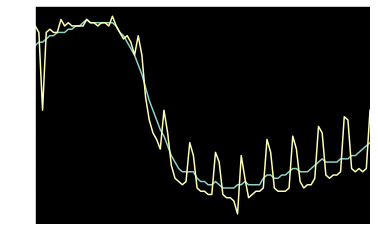

In [42]:
master_df['smooth_workplaces_percent_change_from_baseline'][master_df['CountryName'] == 'United States'].plot()
master_df['workplaces_percent_change_from_baseline'][master_df['CountryName'] == 'United States'].plot()

9752
9843


In [20]:
master_df['smooth'] = 0
master_df['smooth'].iloc[9752:9843] = usa['smooth']

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
hi = smooth_df()
hi

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,smooth,smooth_workplaces_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.0,0.0,0.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.0,0.0,0.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.0,0.0,0.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.0,0.0,0.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,10483,Taiwan,TWN,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-12,-15.0,3.0,-14.0,-19.0,8.0,3.0,0.0,5.014293
10484,10484,Taiwan,TWN,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-13,-11.0,4.0,1.0,-15.0,9.0,2.0,0.0,4.919259
10485,10485,Taiwan,TWN,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-14,-10.0,5.0,-9.0,-18.0,7.0,-2.0,0.0,4.525671
10486,10486,Taiwan,TWN,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-15,-5.0,6.0,0.0,-11.0,2.0,1.0,0.0,3.791111


In [22]:
hi.plot('Unnammed: 0', 'smooth_workplaces_percent_change_from_baseline')

KeyError: 'Unnammed: 0'